<a href="https://colab.research.google.com/github/adudjk/EXTC-Engg-Labs/blob/main/Morphology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving pcb.png to pcb.png


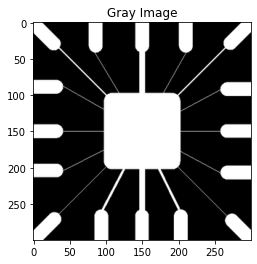

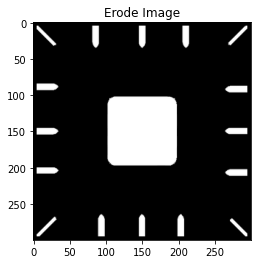

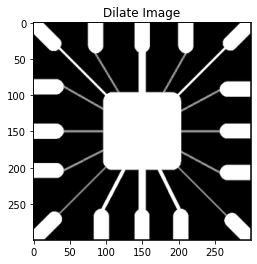

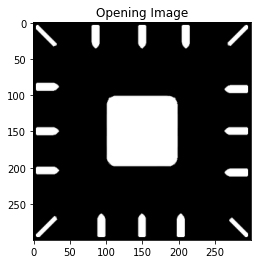

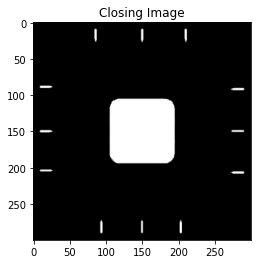

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import mahotas as mh
from google.colab import files
files.upload()

# Read the image
img = cv2.imread('pcb.png')

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap=plt.cm.gray)
plt.title('Gray Image')
plt.show()

m,n = gray_img.shape

# Erosion
k = 11
SE = np.ones((k,k), dtype=np.uint8)
c = (k-1)//2

imgEr = np.zeros((m,n), dtype=np.uint8)
for i in range(c, m-c):
  for j in range(c, n-c):
    temp= gray_img[i-c:i+c+1,  j-c:j+c+1]
    product= temp*SE
    imgEr[i,j]= np.min(product)

plt.imshow(imgEr, cmap="gray")
plt.title('Erode Image')
plt.show()

# Dilation
imgDlt = np.zeros((m,n), dtype=np.uint8)

SED= np.array([[0,1,0], [1,1,1],[0,1,0]])
c1=1

for i in range(c1, m-1):
  for j in range(1,n-c1):
    temp= gray_img[i-c1:i+c1+1, j-c1:j+c1+1]
    product= temp*SED
    imgDlt[i,j]= np.max(product)

plt.imshow(imgDlt,cmap="gray")
plt.title('Dilate Image')
plt.show()

# Opening & Closing
def erosion(gray_img, SE):
  k = 11
  SE = np.ones((k,k), dtype=np.uint8)
  c = (k-1)//2
  imgErode = np.zeros((m,n), dtype=np.uint8)
  for i in range(c, m-c):
    for j in range(c, n-c):
      temp= gray_img[i-c:i+c+1,  j-c:j+c+1]
      product= temp*SE
      imgErode[i,j]= np.min(product)
  return imgErode

def dilation(gray_img, SE):
 imgDilate = np.zeros((m,n), dtype=np.uint8)
 SED= np.array([[0,1,0], [1,1,1],[0,1,0]])
 c1=1
 for i in range(c1, m-1):
   for j in range(1,n-c1):
     temp= gray_img[i-c1:i+c1+1, j-c1:j+c1+1]
     product= temp*SED
     imgDilate[i,j]= np.max(product)
 return imgDilate

SE= cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))

imgEr1= erosion(gray_img,SE)
imgOp= dilation(imgEr1, SE)
plt.imshow(imgOp,cmap="gray")
plt.title('Opening Image')
plt.show()

imgOp_Dlt= dilation(imgOp,SE)
imgCL= erosion(imgOp_Dlt, SE)
plt.imshow(imgCL,cmap="gray")
plt.title('Closing Image')
plt.show()